# A Straightforward Example for Auto-Correlation Spectra

## Importing Libraries and Objects

In [1]:
from MultiChSS_SpectrumConfig import SpectrumConfig, DataImportConfig
from MultiChSS_SpectrumCalculator import SpectrumCalculator
from MultiChSS_CrossConfig import CrossConfig
from MultiChSS_PlotConfig import PlotConfig
from MultiChSS_SpectrumPlotter import SpectrumPlotter

import numpy as np
import matplotlib.pyplot as plt

## Load and Configure Your Data

Here, we have an npz file, we would like to assess. This is a standard Numpy function to load and name your data.

In [3]:
data1=np.load('/Users/armin/sciebo/AG Spektroskopie Projektbox/4Armin/PhDProjects/SignalSnapPaper/long_simulation.npz')
x = data1['x'][0:1000000000]
m = data1['m'][0:1000000000]

Now, we come to configuration of the imported data to make them understandable for SignalSnap.

In [5]:
config1 = DataImportConfig(data=x)
config2 = DataImportConfig(data=m)
selected_data = [0,1] # because we want to evaluate both arrays. 
                      # If only one was of interest, we could have used selected_data = [0]

It is time for configuration of the spectra calculation.

* `dt`: is the sampling rate $dt$
* `f_min`: is the minimum frequency $\omega_{\text{min}}/2\pi$. (for third order spectrum it has to be 0)
* `f_max`: is the maximum frequency $\omega_{\text{max}}/2\pi$. If you don't choose any value it will automatically be the __Nyquist frequency__, which is half of the sampling frequency.
* `s3_calc`: can either be `1/2` or `1/4`. (it will be explained later.)
* `f_unit`: the unit of the frequency
* `backend`: here you choose your backend! It can either be `cpu`, `mps` or `cuda`.
* `order_in`: is the order of the spectra you want to calculate.
* `spectrum_size`: is the resolution of the spectra.
* `show_first_frame`: if `True` you can see the first frame of the data. Here, you can have a feeling if the data are too coherent (if yes then try a to include more data in the frames in order to have a stationary data and not coherent!)

Then, we come to the cross calculation config. For now, let's keep it simple and stick to auto-correlations spectra only. For that matter, all you need to do is to set `auto_corr` to `True` and that would be it!

In [7]:
sconfig = SpectrumConfig(dt=0.001, f_min=0, f_max=5, s3_calc='1/4',f_unit='MHz', backend='mps', order_in=[1, 2, 3, 4], spectrum_size=1000, 
                         show_first_frame=True)

cconfig = CrossConfig(auto_corr=True)

## Calculate the spectra
It's time to feed SignalSnap the configurations and let it do its magic! The object `SpectrumCalculator` wants only to know, what the 
* `DataImportConfig` (as a list!)
* `selected_data`
* `SpectrumConfig`
* `CrossConfig`

were! 

This object has the function `calc_spec`. When you call it the calculation is executed!

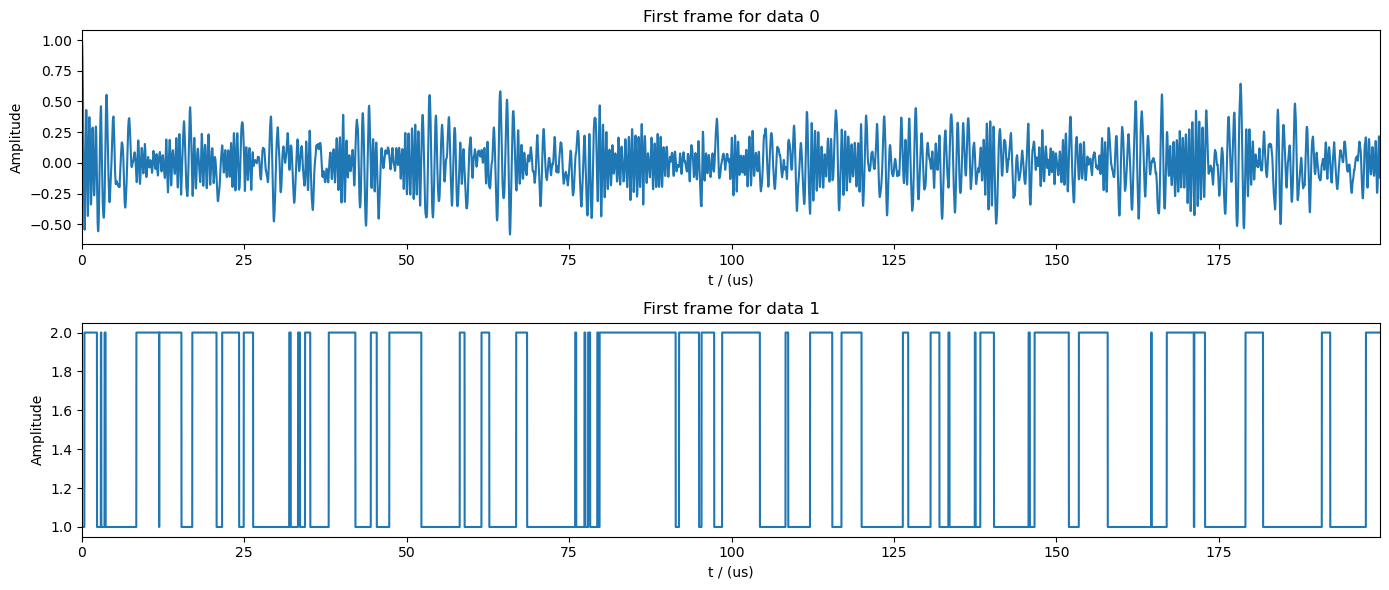

python(21422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
scalc = SpectrumCalculator(sconfig, cconfig, [config1, config2], selected=selected_data)
scalc.calc_spec();

The two diagrams show up because of `show_first_frame=True`. Here, we see that the both traces do not look 
coherent at all and the calculation is reliable!

The data is already accessible via:
`scalc.s`, `scalc.s_err` and `scalc.freq`. They are all dictionaries with the order as their keys! You can, of course, save this data for later use, put them on diagram etc. They are yours!

## Plot your spectra (if you want!)
You can also use the SignalSnap's build-in routine to visualize your results! For that matter, you need to set the configuration for the visualization using `PlotConfig`. __These settings have NO effect on the data and are just for the visualization__
* `f_min`: is the minimum frquency for the plots.
* `f_max`: is the maximum frquency for the plots.
* `display_orders`: is the orders you want to visualize.
* `significance`: is the $\pm$ number multiplied by standard deviations from the mean.
* `arcsinh_scale`: think of it as logarithmic scaling but suitable when the results are also non-positive. Here, it is a tuple and has only effect if the first index is `True`. The second index is the actual scaling. For more extreme scaling, this number should be smaller!
* `plot_format`: if you want to visualize the real part of the spectra only, you can go with `['re']` and if imaginary contribution is in interest `['im']`. Here, we want to visualize both so `['re', 'im']`.
* `insignif_transparency`: is the transparency of the insignificant part. The value is $0 \leq \text{transparency} \leq 1$. If it is 1, then you cannot see any insignificancy and if it is on 0, all the points are visible, even if they don't carry a meaningful value.

The new configuration object goes with other configurations, namely, `sconfig` and `cconfig`, the results, `scalc` in `SpectrumPlotter`. The visulization can be executed using `display` function.

+---------------+------------------------+------------------------+
| Dataset Index |           S1           |        Error S1        |
+---------------+------------------------+------------------------+
|      0.0      | -9.091571882891003e-06 | 1.858981340774335e-05  |
|      1.0      |   1.333413004875183    | 0.00029297947185114026 |
+---------------+------------------------+------------------------+


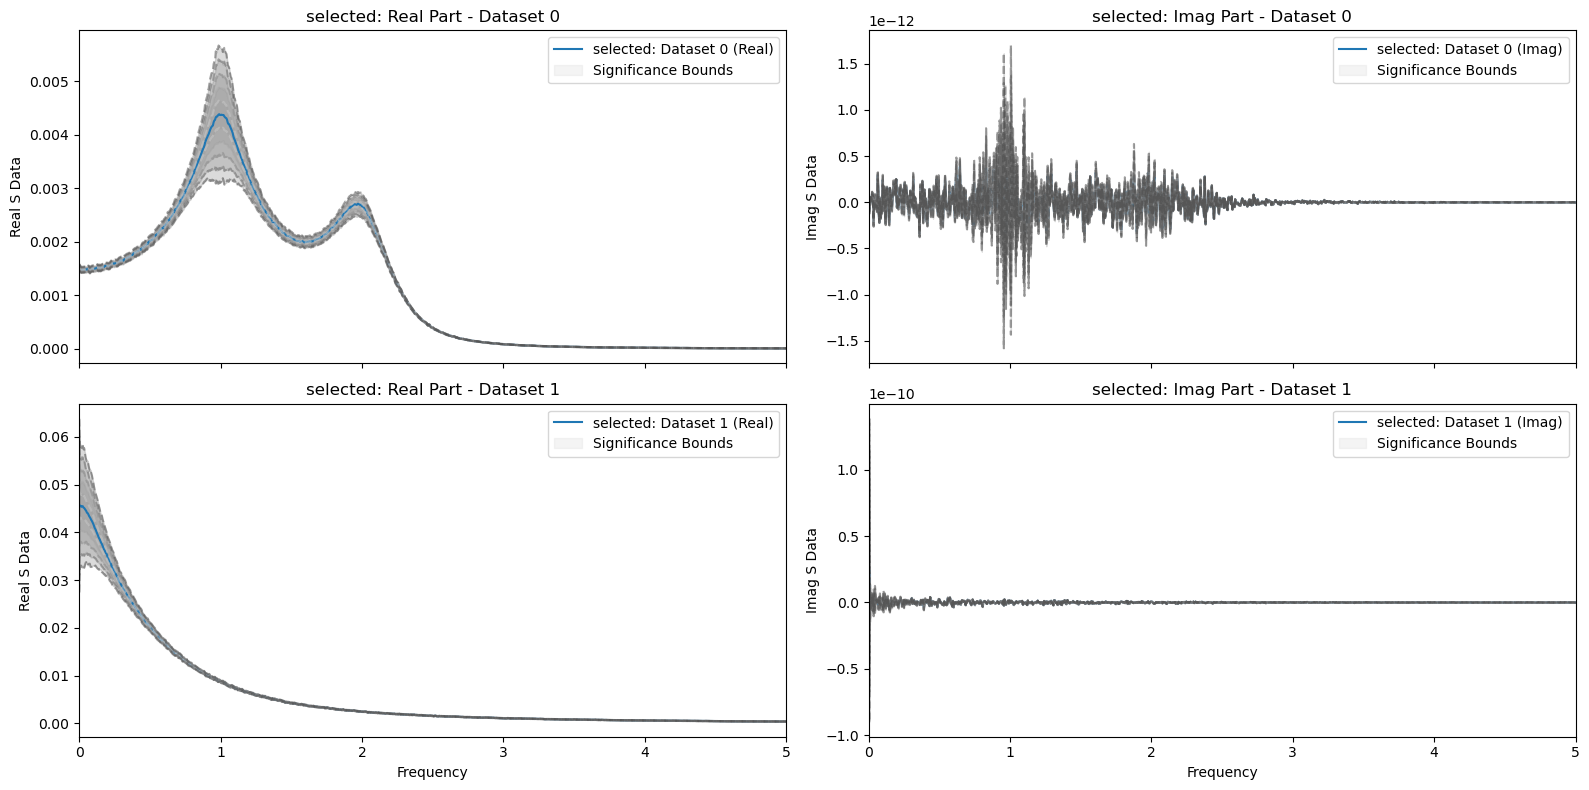


S2 Scaling Information:
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+


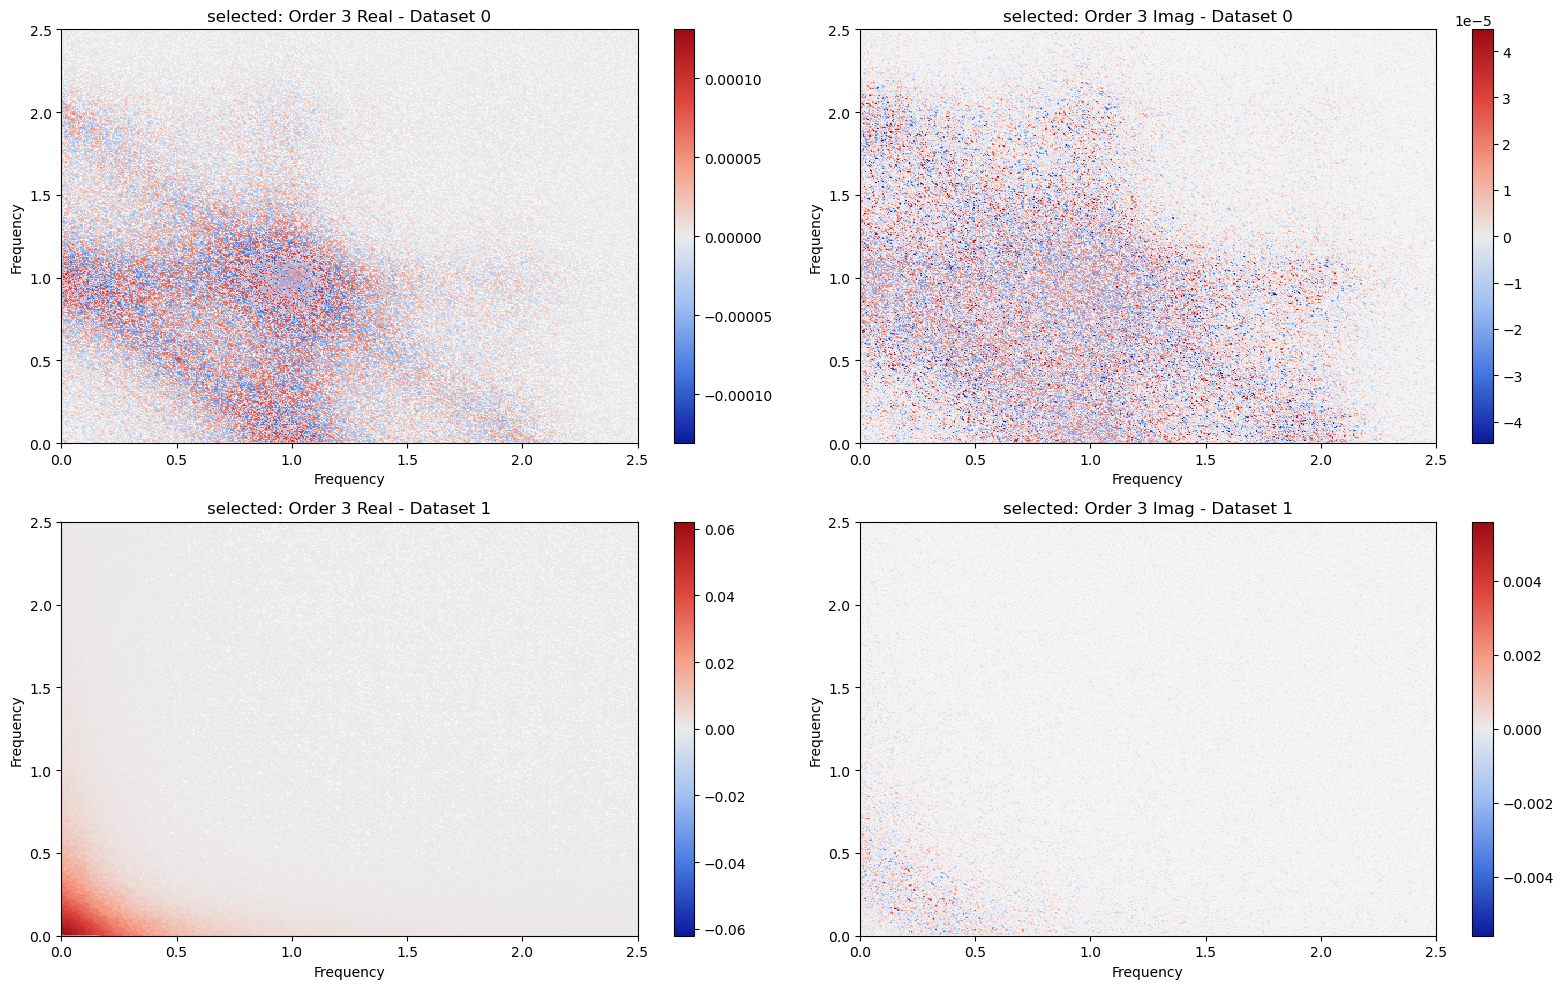


S3 Scaling Information (Normal):
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+
No cross order 3 data available.


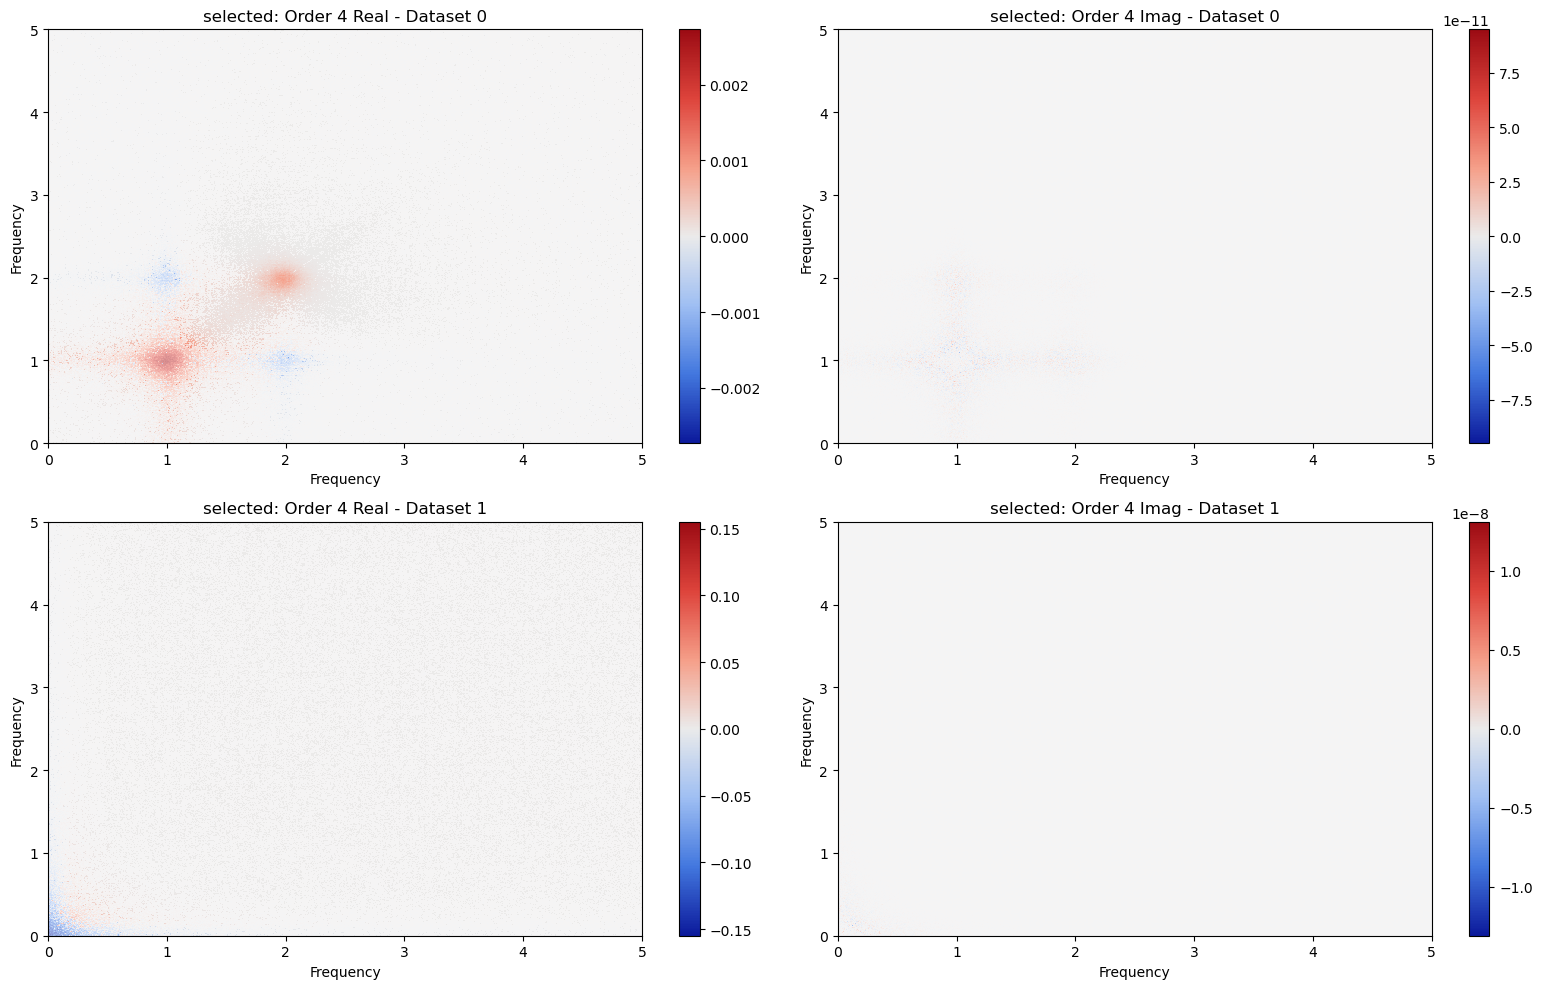


S4 Scaling Information (Normal):
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+
No cross order 4 data available.


In [30]:
pconfig = PlotConfig(f_min=0, f_max=5, display_orders=[1, 2, 3, 4], significance=5, arcsinh_scale=(True, 0.02),
                     plot_format=['re', 'im'], insignif_transparency=0.5)
plotter = SpectrumPlotter(sconfig, cconfig, scalc, pconfig)
plotter.display()